PyTorch version: 2.5.1+cpu
Torchvision version: 0.20.1+cpu
CUDA is available: False

image 1/1 C:\Users\karishma.thumu\segment-anything\input_img.jpg: 352x640 1 cat, 306.3ms
Speed: 14.6ms preprocess, 306.3ms inference, 11.8ms postprocess per image at shape (1, 3, 352, 640)
Results saved to C:\Users\karishma.thumu\runs\detect\predict3


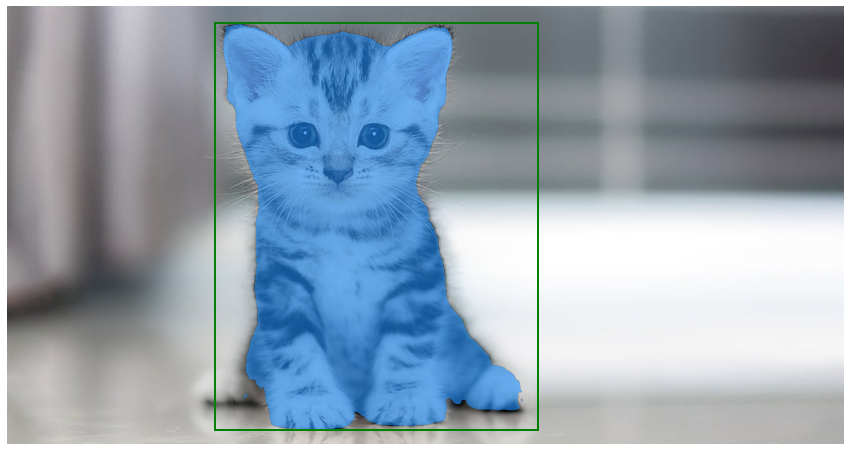

In [1]:
import torch
import torchvision
import sys
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
from segment_anything import SamPredictor, sam_model_registry
from ultralytics import YOLO

print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())
# Load a model
model_path = 'yolov8n.pt' # YOLO pretrained model or your own custom model
model = YOLO(model_path)  # load a pretrained model 6.23M

# Use the model
image_path = r'C:\Users\karishma.thumu\segment-anything\input_img.jpg'
results = model.predict(image_path, save=True)  # predict on an image
results[0].boxes.data

# change this section accordin to your data requirement
my_box = np.array([])
for i, item in enumerate(results[0].cpu().numpy()):
  if item.boxes.cls == 15:  # pick the first box for detected object, class 15 (i.e. cat)
    my_box = item.boxes.xyxy
    break
my_box[0].astype('int').tolist()

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


sam_checkpoint = r'C:\Users\karishma.thumu\segment-anything\sam_vit_b_01ec64.pth'
model_type = "vit_b"

device = "cpu" 

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

predictor.set_image(image)

masks, _, _ = predictor.predict(
    point_coords=None,
    point_labels=None,
    box=my_box[None, :],
    multimask_output=False,
)

# helper functions 

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image) 
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    
    

plt.figure(figsize=(15, 15))
plt.imshow(image)
show_mask(masks[0], plt.gca())
show_box(my_box[0], plt.gca())
plt.axis('off')
plt.show()